# 00. Table of Content
### 01. Importing Libraries & Datasets
### 02. Data Cleaning
### 03. Exploring Relationships
### 04. Answers to Key Questions & Research Hypothesis

# 01. Importing Libraries & Datasets

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os

In [2]:
matplotlib.__version__

'3.7.2'

In [3]:
# Charts are displayed in notebook without the need to "call" them specifically.
%matplotlib inline

In [4]:
# Create path
path = r'C:\Users\krist\21.02.2024 World Happiness Report Analysis'

In [5]:
# Import D1
d1_full = pd.read_csv(os.path.join(path, '02 Data', 'Sourced Data', 'd1_full_score_data (2005-2022).csv'), index_col = False)

# 02. Data Cleaning

### Missing Values Check Sourced Data

In [8]:
# Check for missing values
d1_full.isnull().sum()

country name                          0
year                                  0
life Ladder                           0
log GDP per capita                   20
social support                       13
healthy life expectancy at birth     54
freedom to make life choices         33
generosity                           73
perceptions of corruption           116
positive affect                      24
negative affect                      16
dtype: int64

In [9]:
# Several missing values due to left out poll answers and/or availability of recent data

In [10]:
# Check countries with corruption null values
mv_corruption = d1_full[d1_full['perceptions of corruption'].isnull()].groupby('country name').count()

In [11]:
mv_corruption

,year,life Ladder,log GDP per capita,social support,healthy life expectancy at birth,freedom to make life choices,generosity,perceptions of corruption,positive affect,negative affect
country name,,,,,,,,,,
Algeria,2,2,2,2,2,0,0,0,2,2
Bahrain,6,6,6,5,6,5,5,0,5,5
Cambodia,1,1,1,1,1,1,1,0,1,1
China,16,16,16,16,16,11,15,0,16,16
Congo (Brazzaville),1,1,1,1,1,1,1,0,1,1
Cuba,1,1,0,1,1,1,0,0,1,1
Egypt,7,7,7,7,7,7,6,0,7,7
Ethiopia,1,1,1,1,1,1,1,0,1,1
Jordan,11,11,11,11,11,11,11,0,8,8


In [12]:
# Create d1_full version without missing values for variable relationship exploration
# Drop all rows with missing values
d1_full_cleaned = d1_full.dropna()

In [13]:
# Check for missing values
d1_full_cleaned.isnull().sum()

country name                        0
year                                0
life Ladder                         0
log GDP per capita                  0
social support                      0
healthy life expectancy at birth    0
freedom to make life choices        0
generosity                          0
perceptions of corruption           0
positive affect                     0
negative affect                     0
dtype: int64

### Duplicate Check

In [76]:
# Find duplicates
d1_full_cleaned_dups = d1_full_cleaned[d1_full.duplicated()]

C:\Users\krist\AppData\Local\Temp\ipykernel_231288\1821984544.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  d1_full_cleaned_dups = d1_full_cleaned[d1_full.duplicated()]


In [77]:
d1_full_cleaned_dups

,country name,year,life Ladder,log GDP per capita,social support,healthy life expectancy at birth,freedom to make life choices,generosity,perceptions of corruption,positive affect,negative affect


#### No duplicates found

### Mixed-type Data

In [78]:
d1_full_cleaned.dtypes

country name                         object
year                                  int64
life Ladder                         float64
log GDP per capita                  float64
social support                      float64
healthy life expectancy at birth    float64
freedom to make life choices        float64
generosity                          float64
perceptions of corruption           float64
positive affect                     float64
negative affect                     float64
dtype: object

In [79]:
for col in d1_full_cleaned.columns.tolist():
      weird = (d1_full_cleaned[[col]].applymap(type) != d1_full_cleaned[[col]].iloc[0].apply(type)).any(axis = 1)
      if len (d1_full_cleaned[weird]) > 0:
        print (col)

C:\Users\krist\AppData\Local\Temp\ipykernel_231288\2788940734.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  weird = (d1_full_cleaned[[col]].applymap(type) != d1_full_cleaned[[col]].iloc[0].apply(type)).any(axis = 1)
C:\Users\krist\AppData\Local\Temp\ipykernel_231288\2788940734.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  weird = (d1_full_cleaned[[col]].applymap(type) != d1_full_cleaned[[col]].iloc[0].apply(type)).any(axis = 1)
C:\Users\krist\AppData\Local\Temp\ipykernel_231288\2788940734.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  weird = (d1_full_cleaned[[col]].applymap(type) != d1_full_cleaned[[col]].iloc[0].apply(type)).any(axis = 1)
C:\Users\krist\AppData\Local\Temp\ipykernel_231288\2788940734.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  weird = (d1_full_cleaned[[col]].applymap(type) != d1_full_cleaned[[c

#### No mixed-tape data

# 03. Exploring Relationships

#### To explore the relationship between the ladder score and the 6 key factors I looked at D1 since D2 contains the subbars of the key factors as explanatory variables to the ladder score.

### Correlations

In [27]:
# Create d1 for correlation matrix
d1_cor = d1_full_cleaned.drop(columns=['country name', 'year'])

In [28]:
d1_cor.head()

,life Ladder,log GDP per capita,social support,healthy life expectancy at birth,freedom to make life choices,generosity,perceptions of corruption,positive affect,negative affect
0,3.724,7.350,0.451,50.5,0.718,0.168,0.882,0.414,0.258
1,4.402,7.509,0.552,50.8,0.679,0.191,0.850,0.481,0.237
2,4.758,7.614,0.539,51.1,0.600,0.121,0.707,0.517,0.275
3,3.832,7.581,0.521,51.4,0.496,0.164,0.731,0.480,0.267
4,3.783,7.661,0.521,51.7,0.531,0.238,0.776,0.614,0.268


In [31]:
# Create a correlation matrix using pandas for d1_cor
d1_cor.corr()

,life Ladder,log GDP per capita,social support,healthy life expectancy at birth,freedom to make life choices,generosity,perceptions of corruption,positive affect,negative affect
life Ladder,1.000000,0.787953,0.723136,0.724442,0.529974,0.170073,-0.450860,0.510870,-0.337888
log GDP per capita,0.787953,1.000000,0.696195,0.831131,0.354568,-0.022900,-0.349880,0.230478,-0.259388
social support,0.723136,0.696195,1.000000,0.601353,0.402641,0.059558,-0.224822,0.435797,-0.451464
healthy life expectancy at birth,0.724442,0.831131,0.601353,1.000000,0.366184,0.008321,-0.304515,0.219600,-0.138320
freedom to make life choices,0.529974,0.354568,0.402641,0.366184,1.000000,0.319286,-0.480781,0.587204,-0.271530
generosity,0.170073,-0.022900,0.059558,0.008321,0.319286,1.000000,-0.281524,0.319715,-0.082250
perceptions of corruption,-0.450860,-0.349880,-0.224822,-0.304515,-0.480781,-0.281524,1.000000,-0.292139,0.276674
positive affect,0.510870,0.230478,0.435797,0.219600,0.587204,0.319715,-0.292139,1.000000,-0.328476
negative affect,-0.337888,-0.259388,-0.451464,-0.138320,-0.271530,-0.082250,0.276674,-0.328476,1.000000


### Create a correlation heatmap using seaborn

    0: no relationship
    0.1–0.3: weak relationship
    0.3–0.5: moderate relationship
    0.5–1.0: strong relationship

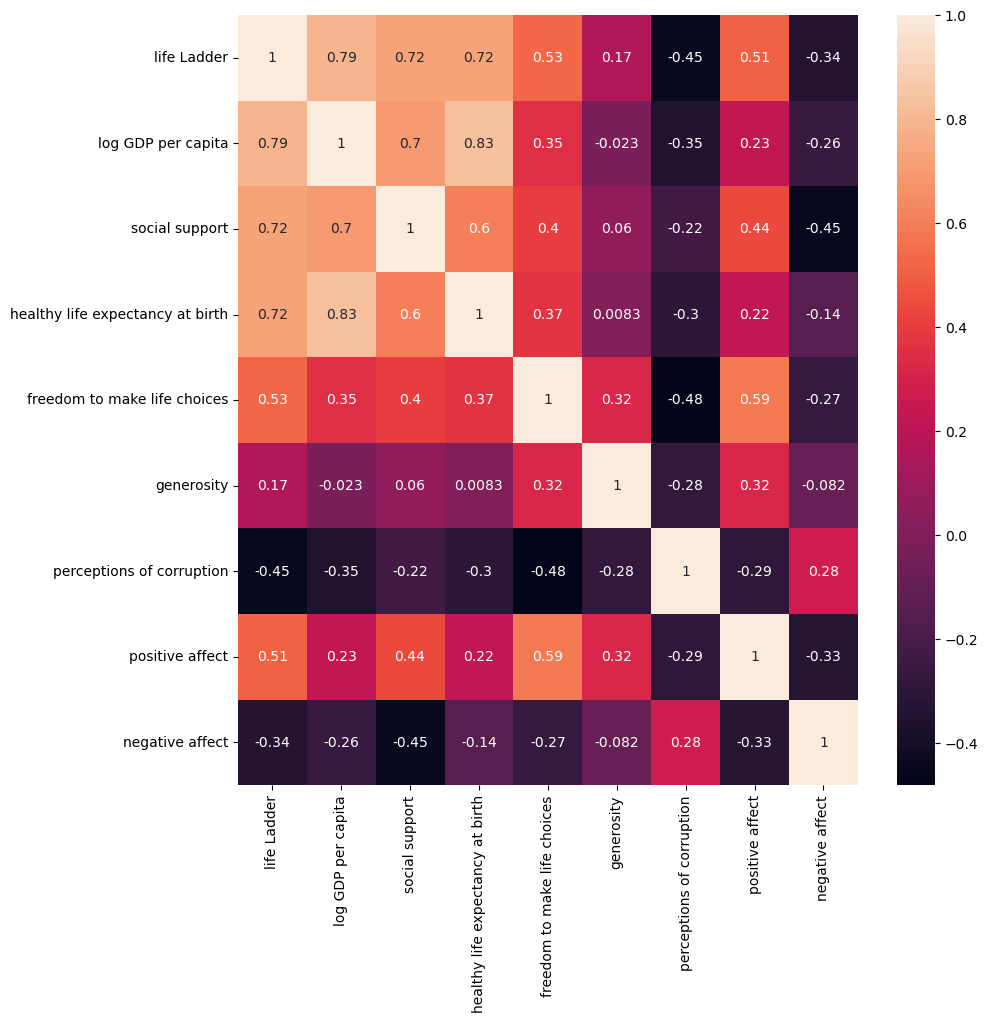

In [33]:
# Create a subplot with matplotlib for d1_cor
f,ax = plt.subplots(figsize=(10,10))

# Create the correlation heatmap in seaborn by applying a heatmap onto the correlation matrix and the subplots defined above.
cor1 = sns.heatmap(d1_cor.corr(), annot = True, ax = ax) # The `annot` argument allows the plot to place the correlation coefficients onto the heatmap.

### Looking at the life ladder and it's correlation to the chosen impacting key factors we can see the following relationships

    No Relationship:
    
There is no variable that shows absolutely no relationship with the life ladder which indicates that the impacting key factors are chosen well.
    
    Weak Relationship: 
    
Generosity has a weak and overall the weakest relationship to the life ladder. The way the poll question is phrased 'have you donated money to a charity in the past month?" could potentially be too specific to address the generosity level globally?! Considering the other key factors it is understandable that this one might have a lower impact.
    
    Moderate Relationship: 
    
The negative effect and perceptions of corruption have a moderate negative relationship to the life ladder. This makes sense considering less feelings of worry, sadness and anger would likely lead to a higher happiness ranking. The same makes sense for perceptions of corruption - the less corruption is witnessed the happier the overall ranking.
    
    Strong Relationship: 
    
Positive effect and freedom to make life choices are in the lower end of strong relationships while life expectancy, social support and log GDP per capita rank the strongest. Considering the poll questions one could argue that wealth, health and social connections are the main contributers to a happy ranking, while enjoyment & freedom of choice are important but maybe less impactful. An example would be a healthy, socially supported person that earns enough to life, but maybe not following the exact occupation of their choice.

### Create scatterplots for the 3 key factors selected for the research hypothesis

Research Hypothesis: The corona pandemic has impacted on people’s lives in regards to happiness world-wide since it impacted on ‘freedom’ (freedom to make life choices), potentially ‘corruption’ (perception of corruption/mistrust in the government) as well as on social support.

C:\Users\krist\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


Text(0.5, 1.0, 'Relationship Life Ladder vs Social Support')

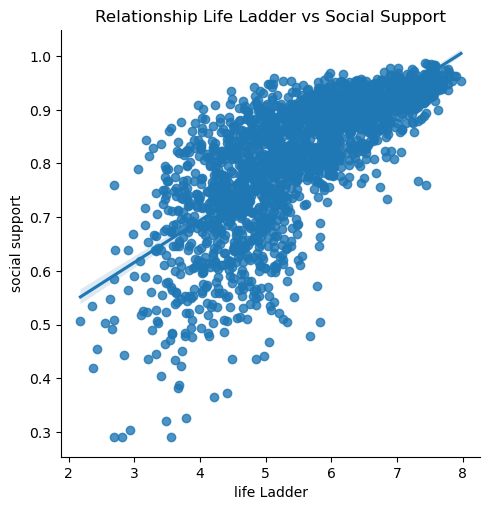

In [36]:
sns.lmplot(x = 'life Ladder', y = 'social support', data = d1_cor)
plt.title('Relationship Life Ladder vs Social Support')

Linear hypothesis: The higher the social support ranking the higher the life ladder ranking.
Observations are scattered around the trend line - there are quite some outliers of high social support and low life ladder rankings or the other way around

C:\Users\krist\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


Text(0.5, 1.0, 'Relationship Life Ladder vs Freedom to make life choices')

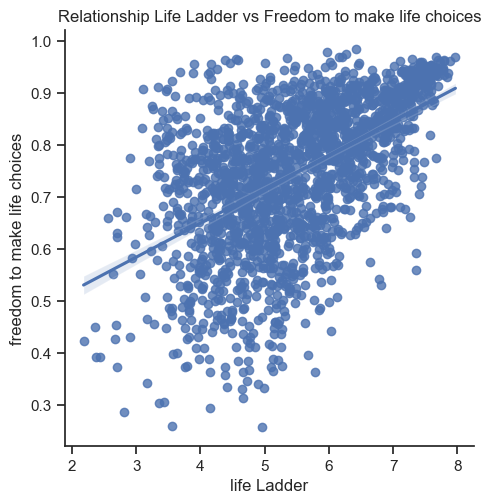

In [58]:
sns.lmplot(x = 'life Ladder', y = 'freedom to make life choices', data = d1_cor)
plt.title('Relationship Life Ladder vs Freedom to make life choices')

Linear hypothesis: The higher the freedom to make life choices score the higher the life ladder score.
Observations are scattered even more broadly around the trend line - there are quite some outliers of high high freedom to make life choices and low life ladder rankings or the other way around.

C:\Users\krist\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


Text(0.5, 1.0, 'Relationship Life Ladder vs Perceptions of corruption')

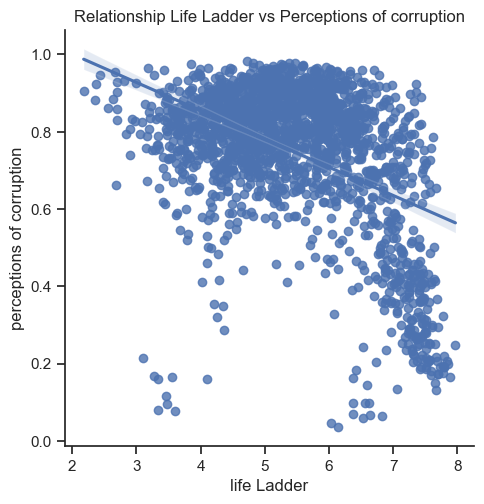

In [59]:
sns.lmplot(x = 'life Ladder', y = 'perceptions of corruption', data = d1_cor)
plt.title('Relationship Life Ladder vs Perceptions of corruption')

Linear hypothesis: The higher the perceptions of corruptopm score the lower the life ladder score.
Multiple obeservations far from trend line. High perceptions of corruption scores on high life ladder scores as well as some low perceptions of corruption scores on low life ladder scores.

### Create a pair plot

C:\Users\krist\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\krist\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\krist\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\krist\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

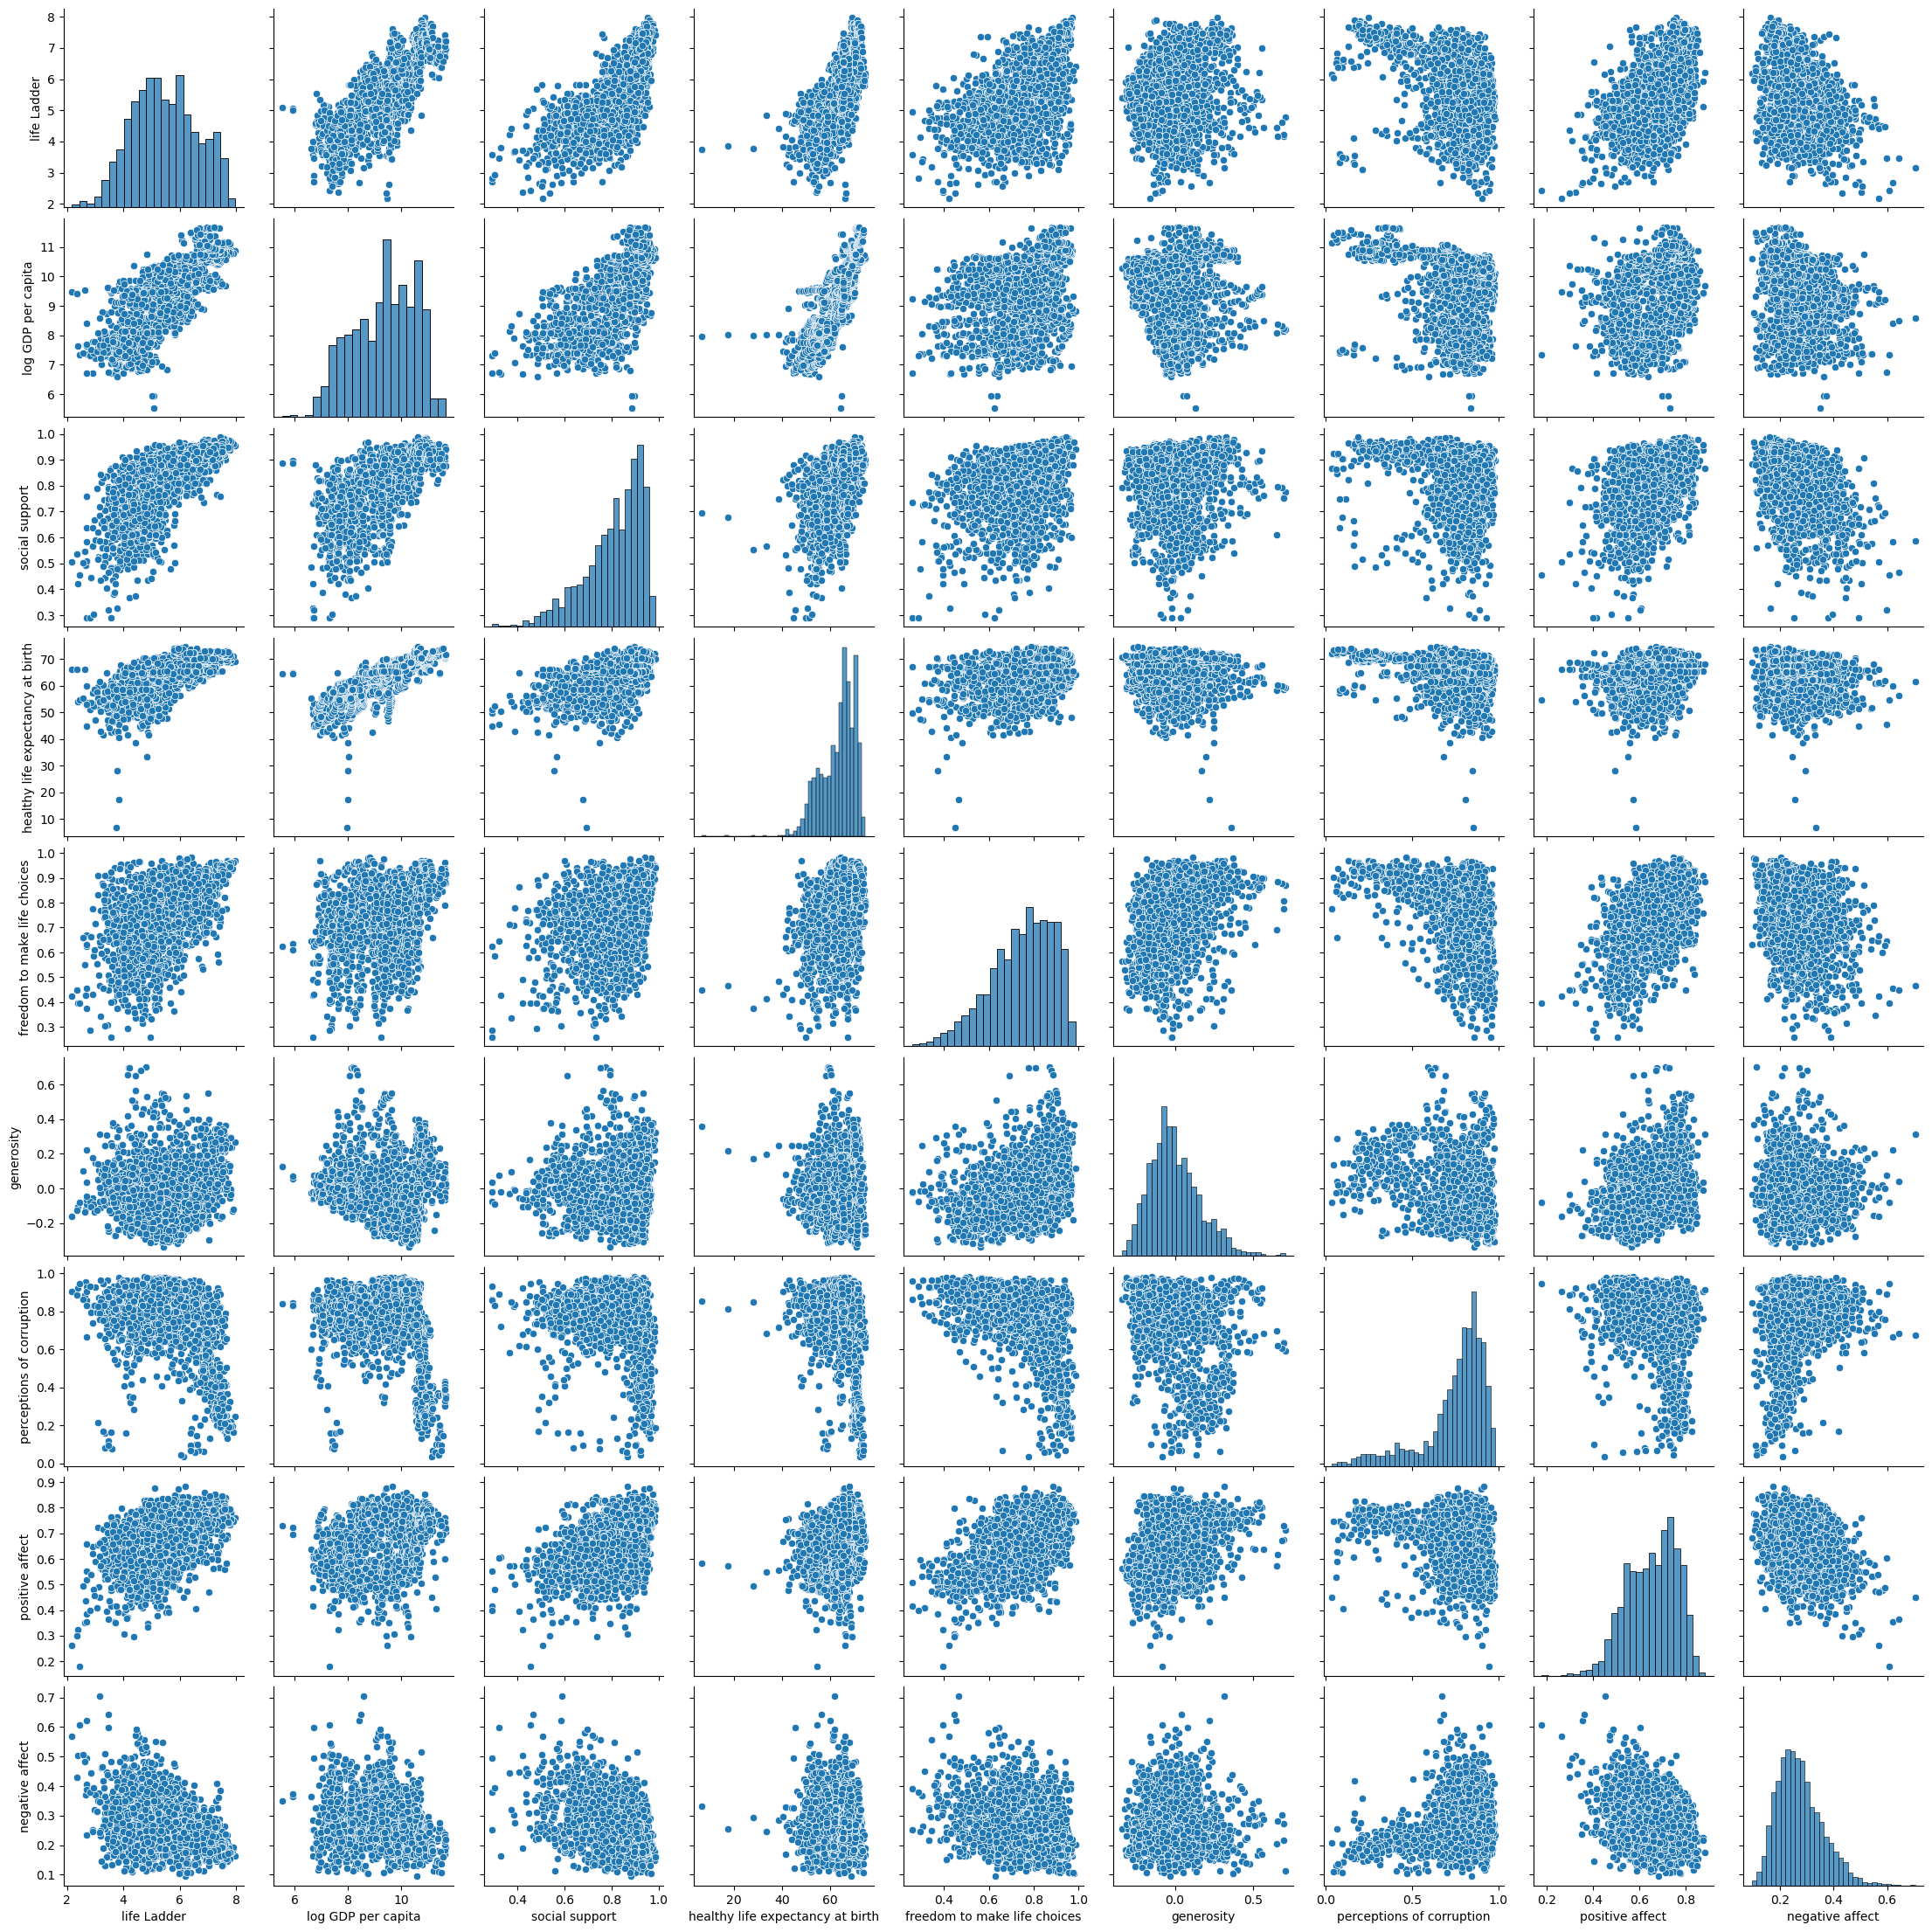

In [37]:
g = sns.pairplot(d1_cor)

    a. In terms of the life ladder variable I find the variables 'perception of corruption' and 'freedom to make life choices' interesting since they are very broadly scattered (there are both very high and very low rankings for the same life ladder score). 
    b. Healthy life expectancy at birth has some curious low outliers that are worth investigatig.
    c. The relationship of 'log GDP per capita' versus 'social support' might be interesting to investigate - I wouldn't have necessarily expected that people living in 'higher GDP per capita'-countries have more social support (thinking of smaller and less closely-knit family structures)
    d. Generosity is an interesting variable overall - it has a lot of low rankings in relationship to many other high ranking factors, e.g. high log-GDP per capita, high social support, high life expectancy - I would like to understand this variable better

### Categorical Plot

#### I will continue to further investigate the variables 'social' support', 'freedom to make life choices' and 'perceptions of corruption' in line with my research hypothesis

##### 1. Creating a categorical variable that splits the "Social Support" column into categories

C:\Users\krist\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='social support', ylabel='Count'>

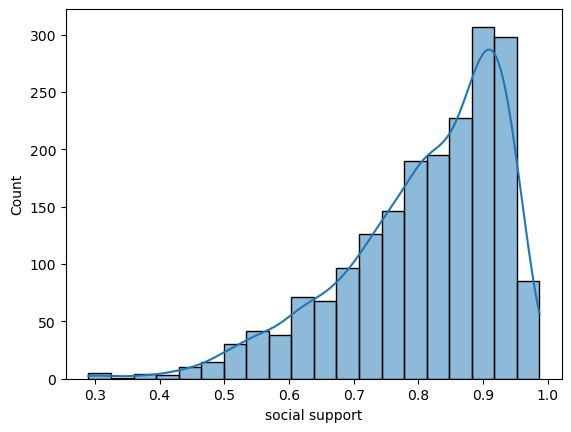

In [39]:
# Use a histogram to visualize the distribution of the variables. 
# Determine sensible categories for the variable ranges. 
# Don't end up with too few observations in any one of the categories.
# The argument "kde" add a line that encompasses the distribution

sns.histplot(d1_cor['social support'], bins = 20, kde = True)

In [66]:
d1_cor.loc[d1_cor['social support'] < 0.6, 'support category'] = 'low support'

In [67]:
d1_cor.loc[(d1_cor['social support'] >= 0.6) & (d1_cor['social support'] < 0.8), 'support category'] = 'medium support'

In [68]:
d1_cor.loc[d1_cor['social support'] >= 0.8, 'support category'] = 'high support'

In [69]:
d1_cor['support category'].value_counts(dropna = False)

support category
high support      1193
medium support     623
low support        142
Name: count, dtype: int64

In [70]:
d1_cor.columns

Index(['life Ladder', 'log GDP per capita', 'social support',
       'healthy life expectancy at birth', 'freedom to make life choices',
       'generosity', 'perceptions of corruption', 'positive affect',
       'negative affect', 'support category', 'freedom category',
       'corruption category'],
      dtype='object')

C:\Users\krist\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\krist\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\krist\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


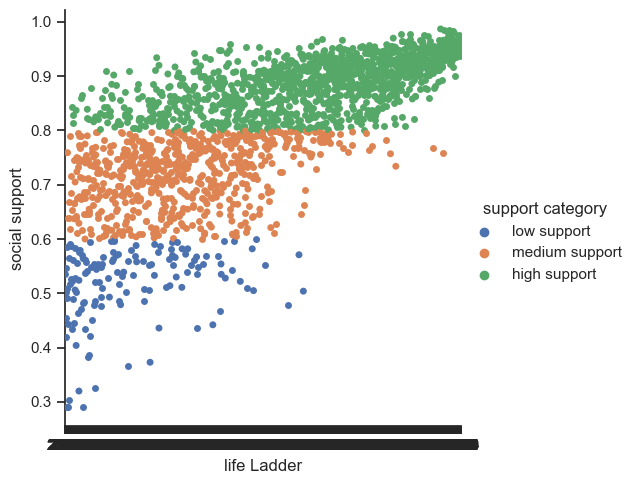

In [71]:
# Creating a categorical plot in seaborn using the support categories created above

sns.set(style="ticks")
g = sns.catplot(x="life Ladder", y="social support", hue="support category", data=d1_cor)

The low support category is fairly small (very few instances with below 0.5 support scores) and not present among higher ladder scores. High support is fairly spread out over lower and higher ladder scores, but has more clustered occurrences towards high ladder scores.
It seems that high social support doesn't necessarily lead to high ladder scores, but it is more likely to see higher ladder scores when there are higher social support scores and very unlikely to see above average ladder scores with low support.

##### 2. Creating a categorical variable that splits the "Freedom to make life choices" column into categories

C:\Users\krist\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='freedom to make life choices', ylabel='Count'>

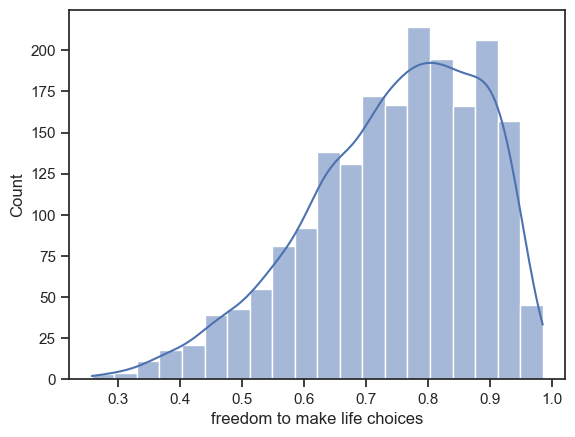

In [46]:
# Use a histogram to visualize the distribution of the variable. 
# Determine sensible categories for the price ranges. 
# Don't end up with too few observations in any one of the categories.
# The argument "kde" add a line that encompasses the distribution

sns.histplot(d1_cor['freedom to make life choices'], bins = 20, kde = True)

In [47]:
d1_cor.loc[d1_cor['freedom to make life choices'] < 0.6, 'freedom category'] = 'low freedom of choice'

In [48]:
d1_cor.loc[(d1_cor['freedom to make life choices'] >= 0.6) & (d1_cor['freedom to make life choices'] < 0.8), 'freedom category'] = 'mid freedom of choice'

In [49]:
d1_cor.loc[d1_cor['freedom to make life choices'] >= 0.8, 'freedom category'] = 'high freedom of choice'

In [50]:
d1_cor['freedom category'].value_counts(dropna = False)

freedom category
mid freedom of choice     862
high freedom of choice    790
low freedom of choice     306
Name: count, dtype: int64

C:\Users\krist\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\krist\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\krist\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


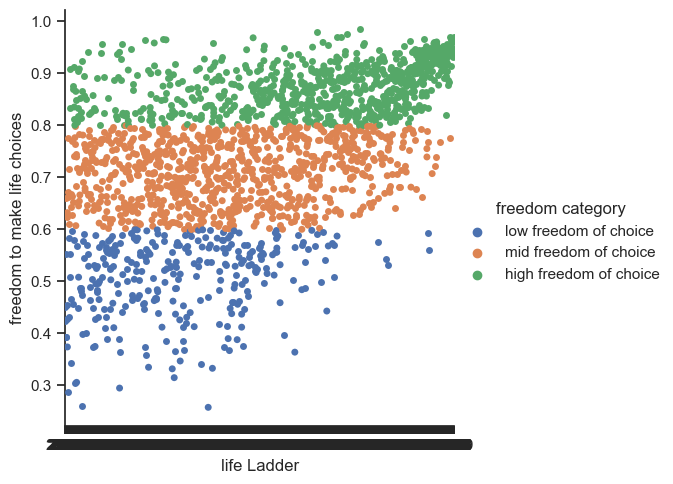

In [51]:
# Creating a categorical plot in seaborn using the freedom categories created above

sns.set(style="ticks")
g = sns.catplot(x="life Ladder", y="freedom to make life choices", hue="freedom category", data=d1_cor)

While there is a clear pattern on higher ladder scores and the higher freedom of choice categories there ar still instances of high ladder score rankings and low freedom of choice rankings as well as low ladder score rankings and high freedom of choice rankings. This makes me think about the question of choices within a certain context. It might be less important to have freedom over your life choices if the limited options given to you are reasonable / acceptable thinking for example of a pleasure - pain scale.

##### 3. Creating a categorical variable that splits the "Perceptions of corruption " column into categories

C:\Users\krist\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='perceptions of corruption', ylabel='Count'>

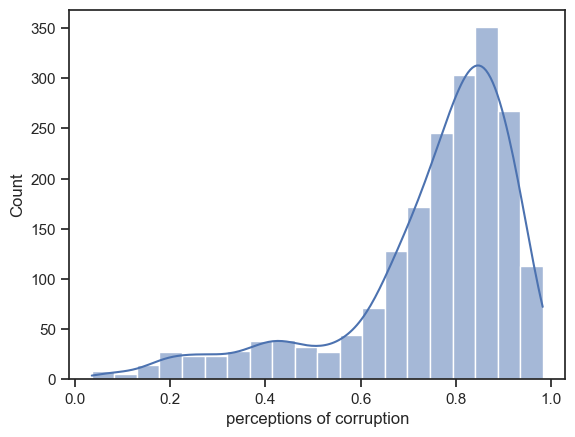

In [52]:
# Use a histogram to visualize the distribution of the variable. 
# Determine sensible categories for the price ranges. 
# Don't end up with too few observations in any one of the categories.
# The argument "kde" add a line that encompasses the distribution

sns.histplot(d1_cor['perceptions of corruption'], bins = 20, kde = True)

In [72]:
d1_cor.loc[d1_cor['perceptions of corruption'] < 0.6, 'corruption category'] = 'low corruption'

In [73]:
d1_cor.loc[(d1_cor['perceptions of corruption'] >= 0.6) & (d1_cor['perceptions of corruption'] < 0.8), 'corruption category'] = 'medium corruption'

In [74]:
d1_cor.loc[d1_cor['perceptions of corruption'] >= 0.8, 'corruption category'] = 'high corruption'

In [75]:
d1_cor['corruption category'].value_counts(dropna = False)

corruption category
high corruption      995
medium corruption    656
low corruption       307
Name: count, dtype: int64

C:\Users\krist\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\krist\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\krist\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


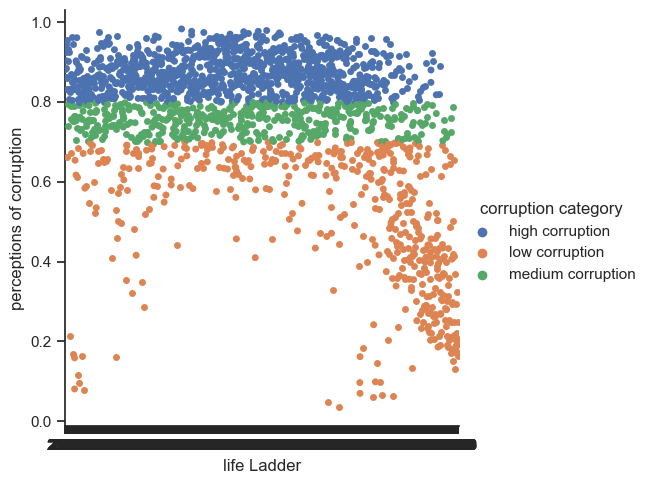

In [57]:
# Creating a categorical plot in seaborn using the freedom categories created above

sns.set(style="ticks")
g = sns.catplot(x="life Ladder", y="perceptions of corruption", hue="corruption category", data=d1_cor)

The medium and high corruption perception category is spread fairly evenly over the full range of the ladder score, however, with noticeably less observations on very high ladder scores). The idea that there is a high happiness ranking while there is a high perception of corruption is curious and counter intuitive. The low corruption category is also widely spread over the range of the ladder score with observations on low ladder scores but a significant clusterin on very high ladder scores. This variable behaves the least predictable from the 3 key factors so far.

# 04. Answers to Key Questions & Research Hypothesis

At this point my intitial research hypothesis: "The corona pandemic has impacted on people’s lives in regards to happiness world-wide since it impacted on ‘freedom’ (freedom to make life choices) and potentially ‘corruption’ (perception of corruption/mistrust in the government)" hasn't been answered since I haven't looked at the development of the variables over the years. I still find the hypothesis interesting and would like to explore it.

I also haven't looked at any distribution over countries which will be part of the further investigation.

One question that has been answered now is the strength of the relationship of the 6 key factors to the overall ladder ranking (see below). 

3 factors have been investigated in more detail - Social Support, Freedom to make life choices and perceptions of corruption with interesting findings:

Social Support: It seems that high social support doesn't necessarily lead to high ladder scores, but it is more likely to see higher ladder scores when there are higher social support scores and very unlikely to see above average ladder scores with low support.

Freedom to make life choices: While there is a clear pattern on higher ladder scores and the higher freedom of choice categories there are still instances of high ladder score rankings and low freedom of choice rankings as well as low ladder score rankings and high freedom of choice rankings. 
It might be less important to have freedom over your life choices if the limited options given to you are reasonable / acceptable?!

Perceptions of corruption: Higher perceptions of corruption ratings can be found over the full range of the ladder score, however, with noticeably less observations on very high ladder scores. The idea that there is a high happiness ranking while there is a high perception of corruption is curious and counter intuitive. Low corruption perceptions are also widely spread over the range of the ladder score with observations on low ladder scores but a significant clusterin on very high ladder scores. This variable behaves the least predictable from the 3 key factors so far.

---

No Relationship:

There is no variable that shows absolutely no relationship with the life ladder which indicates that the impacting key factors are chosen well.

Weak Relationship: 

Generosity has a weak and overall the weakest relationship to the life ladder. The way the poll question is phrased 'have you donated money to a charity in the past month?" could potentially be too specific to address the generosity level globally?! Considering the other key factors it is understandable that this one might have a lower impact.

Moderate Relationship: 

The negative effect and perceptions of corruption have a moderate negative relationship to the life ladder. This makes sense considering less feelings of worry, sadness and anger would likely lead to a higher happiness ranking. The same makes sense for perceptions of corruption - the less corruption is witnessed the happier the overall ranking.

Strong Relationship: 

Positive effect and freedom to make life choices are in the lower end of strong relationships while life expectancy, social support and log GDP per capita rank the strongest. Considering the poll questions one could argue that wealth, health and social connections are the main contributers to a happy ranking, while enjoyment & freedom of choice are important but maybe less impactful. An example would be a healthy, socially supported person that earns enough to life, but maybe not following the exact occupation of their choice.
